# 3. Feature extraction

### Features to consider 
In order to consider which attributes to extract I considered as reference a similar dataset.

In [1]:
import pandas as pd

df = pd.read_csv('dataset/dataset_small.csv')

for col in df.columns:
    print(col)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

Taking into account the feasibility of extracting such features, I'm selecting the following subset: qty_dot_url, qty_hyphen_url, qty_underline_url, qty_slash_url, qty_questionmark_url, qty_equal_url, qty_at_url, qty_and_url, qty_exclamation_url, qty_tilde_url, qty_comma_url, qty_plus_url, qty_asterisk_url, qty_hashtag_url, qty_dollar_url, qty_percent_url, length_url, qty_tld_url, qty_dot_domain, qty_hyphen_domain, qty_underline_domain, qty_slash_domain
qty_questionmark_domain, qty_equal_domain, qty_at_domain, qty_and_domain, qty_exclamation_domain, qty_tilde_domain, qty_comma_domain, qty_plus_domain, qty_asterisk_domain, qty_hashtag_domain, qty_dollar_domain, qty_percent_domain, qty_vowels_domain, domain_length, qty_dot_directory, qty_hyphen_directory, qty_underline_directory, qty_slash_directory, qty_questionmark_directory, qty_equal_directory, qty_at_directory, qty_and_directory, qty_exclamation_directory, qty_tilde_directory, qty_comma_directory, qty_plus_directory, qty_asterisk_directory, qty_hashtag_directory, qty_dollar_directory, qty_percent_directory, directory_length, qty_dot_file, qty_hyphen_file, qty_underline_file, qty_slash_file, qty_questionmark_file, qty_equal_file, qty_at_file, qty_and_file, qty_exclamation_file, qty_tilde_file, qty_comma_file, qty_plus_file, qty_asterisk_file, qty_hashtag_file, qty_dollar_file, qty_percent_file, file_length, qty_dot_params, qty_hyphen_params, qty_underline_params, qty_slash_params, qty_questionmark_params, qty_equal_params, qty_at_params, qty_and_params, qty_exclamation_params, qty_tilde_params, qty_comma_params, qty_plus_params, qty_asterisk_params, qty_hashtag_params, qty_dollar_params, qty_percent_params, params_length, email_in_url.

### URL features

In [2]:
import re
import pandas as pd

df = pd.read_csv('dataset/cleaned_dataset.csv')

def extract_url_features(url):
    features = {}

    features['qty_dot_url'] = url.count('.')
    features['qty_hyphen_url'] = url.count('-')
    features['qty_underline_url'] = url.count('_')
    features['qty_slash_url'] = url.count('/')
    features['qty_questionmark_url'] = url.count('?')
    features['qty_equal_url'] = url.count('=')
    features['qty_at_url'] = url.count('@')
    features['qty_and_url'] = url.count('&')
    features['qty_exclamation_url'] = url.count('!')
    features['qty_tilde_url'] = url.count('~')
    features['qty_comma_url'] = url.count(',')
    features['qty_plus_url'] = url.count('+')
    features['qty_asterisk_url'] = url.count('*')
    features['qty_hashtag_url'] = url.count('#')
    features['qty_dollar_url'] = url.count('$')
    features['qty_percent_url'] = url.count('%')
    
    # top-level domain
    tld_pattern = r'\.[a-z]{2,}$'  # examples: .com, .org, etc.
    features['qty_tld_url'] = len(re.findall(tld_pattern, url))
    
    features['length_url'] = len(url)
    
    return features

url_features = []

# loops through URLs in dataset
for index, row in df.iterrows():
    url = row['URL']
    features = extract_url_features(url)
    url_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs") # logs

features_df = pd.DataFrame(url_features)

X_with_features = pd.concat([df, features_df], axis=1)

X_with_features.to_csv('dataset/url_feats.csv', index=False)
print("Feature extraction complete. See: 'url_feats.csv'")


Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Processed 360000 URLs
Processed 370000 URLs
Processed 380000 URLs
Processed 390000 URLs
Processed 400000 URLs
Processed 410000 URLs
Processed 420000 URLs
Processed 430000 URLs
Processed 440000 URLs
Processed 450000 URLs
Processed 460000 UR

### Domain level features

In [3]:
import socket
import re
import pandas as pd

df = pd.read_csv('dataset/url_feats.csv')

def extract_domain(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    domain = re.findall(r'://(.*?)(/|$)', url)
    if domain:
        return domain[0][0]
    else:
        if url.startswith('www.'):
            return url.split('/')[0].replace('www.', '')
        return url.split('/')[0]

def extract_domain_features(domain):
    features = {}
    
    features['qty_dot_domain'] = domain.count('.')
    features['qty_hyphen_domain'] = domain.count('-')
    features['qty_underline_domain'] = domain.count('_')
    features['qty_slash_domain'] = domain.count('/')
    features['qty_questionmark_domain'] = domain.count('?')
    
    features['qty_equal_domain'] = domain.count('=')
    features['qty_at_domain'] = domain.count('@')
    features['qty_and_domain'] = domain.count('&')
    features['qty_exclamation_domain'] = domain.count('!')
    features['qty_tilde_domain'] = domain.count('~')
    
    features['qty_comma_domain'] = domain.count(',')
    features['qty_plus_domain'] = domain.count('+')
    features['qty_asterisk_domain'] = domain.count('*')
    features['qty_hashtag_domain'] = domain.count('#')
    features['qty_dollar_domain'] = domain.count('$')
    
    features['qty_percent_domain'] = domain.count('%')
    
    features['qty_vowels_domain'] = sum([1 for char in domain if char.lower() in 'aeiou'])
    
    features['domain_length'] = len(domain)
    
    # check if domain is an IP address
    try:
        socket.inet_aton(domain) 
        features['domain_in_ip'] = 1
    except socket.error:
        features['domain_in_ip'] = 0
    
    server_keywords = ['server', 'cloud', 'cdn', 'aws', 'hosting']
    features['server_client_domain'] = int(any(keyword in domain for keyword in server_keywords))

    return features

domain_features = []

for index, row in df.iterrows():
    url = row['URL']
    domain = extract_domain(url)
    features = extract_domain_features(domain)
    domain_features.append(features)
    
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(domain_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/domain_feats.csv', index=False)
print("Domain feature extraction complete:'domain_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Processed 360000 URLs
Processed 370000 URLs
Processed 380000 URLs
Processed 390000 URLs
Processed 400000 URLs
Processed 410000 URLs
Processed 420000 URLs
Processed 430000 URLs
Processed 440000 URLs
Processed 450000 URLs
Processed 460000 UR

### Directory path features

In [12]:
import pandas as pd
import re

df = pd.read_csv('dataset/domain_feats.csv')

def extract_directory(url):
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url
    match = re.search(r'://[^/]+(/.*?)(\?|$)', url)
    if match:
        return match.group(1)  # get directory path
    else:
        return None

def extract_directory_features(directory):
    features = {}
    
    # character mappings
    char_map = {
        'dot': '.',
        'hyphen': '-',
        'underline': '_',
        'slash': '/',
        'questionmark': '?',
        'equal': '=',
        'at': '@',
        'and': '&',
        'exclamation': '!',
        'tilde': '~',
        'comma': ',',
        'plus': '+',
        'asterisk': '*',
        'hashtag': '#',
        'dollar': '$',
        'percent': '%'
    }
    
    if directory is None:
        features['has_dir'] = 0  # no directory part
        # assign 0 to all character counts when there's no directory part
        for char in char_map:
            features[f'qty_{char}_directory'] = 0
        features['directory_length'] = 0
    else:
        features['has_dir'] = 1  # directory part is present
        # count occurrences of each character in the directory
        for char, symbol in char_map.items():
            features[f'qty_{char}_directory'] = directory.count(symbol)
        features['directory_length'] = len(directory)
    
    return features

directory_features = []

for index, row in df.iterrows():
    url = row['URL']
    directory = extract_directory(url)
    features = extract_directory_features(directory)
    directory_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(directory_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/directory_feats.csv', index=False)
print("Directory feature extraction complete: 'directory_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Processed 360000 URLs
Processed 370000 URLs
Processed 380000 URLs
Processed 390000 URLs
Processed 400000 URLs
Processed 410000 URLs
Processed 420000 URLs
Processed 430000 URLs
Processed 440000 URLs
Processed 450000 URLs
Processed 460000 UR

In [13]:
import pandas as pd
import re

df = pd.read_csv('dataset/directory_feats.csv')

def extract_file(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url  

    match = re.search(r'\/([^\/\?]*)(\?|$)', url)
    if match:
        return match.group(1) if match.group(1) else None
    return None

def extract_file_features(file):
    features = {}
    
    # character mappings
    char_map = {
        'dot': '.',
        'hyphen': '-',
        'underline': '_',
        'slash': '/',
        'questionmark': '?',
        'equal': '=',
        'at': '@',
        'and': '&',
        'exclamation': '!',
        'tilde': '~',
        'comma': ',',
        'plus': '+',
        'asterisk': '*',
        'hashtag': '#',
        'dollar': '$',
        'percent': '%'
    }
    
    if file is None:
        features['has_file'] = 0  # no file part
        # assign 0 to all character counts when there's no file part
        for char in char_map:
            features[f'qty_{char}_file'] = 0
        features['file_length'] = 0
    else:
        features['has_file'] = 1  # file part is present
        # count occurrences of each character in the file part
        for char, symbol in char_map.items():
            features[f'qty_{char}_file'] = file.count(symbol)
        features['file_length'] = len(file)
    
    return features

file_features = []

for index, row in df.iterrows():
    url = row['URL']
    file = extract_file(url)
    features = extract_file_features(file)
    file_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(file_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/file_feats.csv', index=False)
print("File feature extraction complete: 'file_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Processed 360000 URLs
Processed 370000 URLs
Processed 380000 URLs
Processed 390000 URLs
Processed 400000 URLs
Processed 410000 URLs
Processed 420000 URLs
Processed 430000 URLs
Processed 440000 URLs
Processed 450000 URLs
Processed 460000 UR

### Parameter domain features

In [15]:
import pandas as pd
import re

df = pd.read_csv('dataset/file_feats.csv')

def extract_params(url):

    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    match = re.search(r'\?(.*)', url)
    if match:
        return match.group(1) 
    return None

# check presence of TLD
def tld_present(params):
    tlds = ['.com', '.net', '.org', '.edu', '.gov', '.co', '.us', '.info']
    if params:
        for tld in tlds:
            if tld in params:
                return 1
    return 0

def extract_params_features(params):
    features = {}
    
    # character mappings
    char_map = {
        'dot': '.',
        'hyphen': '-',
        'underline': '_',
        'slash': '/',
        'questionmark': '?',
        'equal': '=',
        'at': '@',
        'and': '&',
        'exclamation': '!',
        'tilde': '~',
        'comma': ',',
        'plus': '+',
        'asterisk': '*',
        'hashtag': '#',
        'dollar': '$',
        'percent': '%'
    }
    
    if params is None:
        features['has_params'] = 0  # no parameters part
        # assign 0 to all character counts when there's no params part
        for char in char_map:
            features[f'qty_{char}_params'] = 0
        features['params_length'] = 0
        features['tld_present_params'] = 0
        features['qty_params'] = 0
    else:
        features['has_params'] = 1  # params part is present
        # count occurrences of each character in the params part
        for char, symbol in char_map.items():
            features[f'qty_{char}_params'] = params.count(symbol)
            
        features['params_length'] = len(params)
        features['tld_present_params'] = tld_present(params)
        # number of parameters
        features['qty_params'] = len(params.split('&')) if '&' in params else 1 
    
    return features

params_features = []

for index, row in df.iterrows():
    url = row['URL']
    params = extract_params(url)
    features = extract_params_features(params)
    params_features.append(features)

    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1} URLs")

features_df = pd.DataFrame(params_features)

df_with_features = pd.concat([df, features_df], axis=1)

df_with_features.to_csv('dataset/params_feats.csv', index=False)
print("Parameters feature extraction complete: 'params_feats.csv'")

Processed 10000 URLs
Processed 20000 URLs
Processed 30000 URLs
Processed 40000 URLs
Processed 50000 URLs
Processed 60000 URLs
Processed 70000 URLs
Processed 80000 URLs
Processed 90000 URLs
Processed 100000 URLs
Processed 110000 URLs
Processed 120000 URLs
Processed 130000 URLs
Processed 140000 URLs
Processed 150000 URLs
Processed 160000 URLs
Processed 170000 URLs
Processed 180000 URLs
Processed 190000 URLs
Processed 200000 URLs
Processed 210000 URLs
Processed 220000 URLs
Processed 230000 URLs
Processed 240000 URLs
Processed 250000 URLs
Processed 260000 URLs
Processed 270000 URLs
Processed 280000 URLs
Processed 290000 URLs
Processed 300000 URLs
Processed 310000 URLs
Processed 320000 URLs
Processed 330000 URLs
Processed 340000 URLs
Processed 350000 URLs
Processed 360000 URLs
Processed 370000 URLs
Processed 380000 URLs
Processed 390000 URLs
Processed 400000 URLs
Processed 410000 URLs
Processed 420000 URLs
Processed 430000 URLs
Processed 440000 URLs
Processed 450000 URLs
Processed 460000 UR

### Email check and shannon entropy

In [16]:
import pandas as pd
import re

df = pd.read_csv('dataset/params_feats.csv')

def email_in_url(url):
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    
    if re.search(email_pattern, url):
        return 1 # contains an email
    return 0

df['email_in_url'] = df['URL'].apply(email_in_url)

df.to_csv('dataset/email_feats.csv', index=False)
print("Email feature extraction complete: 'email_feats.csv'")

Email feature extraction complete: 'email_feats.csv'


We insert a shannon entropy feature.

In [17]:
import numpy as np

def shannon_entropy(url):
    if not url:
        return 0
    prob = [url.count(c) / len(url) for c in set(url)]
    return -sum(p * np.log2(p) for p in prob)

df["shannon_entropy"] = df["URL"].apply(shannon_entropy)

print(df)

                                                      URL Label  qty_dot_url  \
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad            6   
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad            5   
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad            7   
3       mail.printakid.com/www.online.americanexpress....   bad            6   
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad            1   
...                                                   ...   ...          ...   
569215  clubeamigosdopedrosegundo.com.br/list/index.ph...   bad            5   
569216                     webmailadmin0.myfreesites.net/   bad            2   
569217          www.ezblox.site/free/jennifer111/helpdesk   bad            2   
569218  www.formbuddy.com/cgi-bin/formdisp.pl?u=Twice&...   bad            3   
569219  www.formbuddy.com/cgi-bin/formdisp.pl?u=securi...   bad            3   

        qty_hyphen_url  qty_underline_u

In [18]:
df.to_csv("dataset/all_feats.csv", index=False)

***

A quick analysis on which category of attributes most helps evaluating URL state.

In [19]:
import pandas as pd

df = pd.read_csv('dataset/all_feats.csv')

# identify columns where all values are the same
constant_columns = df.columns[df.nunique() == 1]

print(f"Columns with constant values: {constant_columns.tolist()}")

# remove columns with constant values
df_cleaned = df.drop(columns=constant_columns)

df_cleaned.to_csv('dataset/all_feats1.csv', index=False)

print("Cleaned data is saved to 'all_feats1.csv'.")


Columns with constant values: ['qty_slash_domain', 'qty_questionmark_directory', 'qty_slash_file', 'qty_questionmark_file']
Cleaned data is saved to 'all_feats1.csv'.


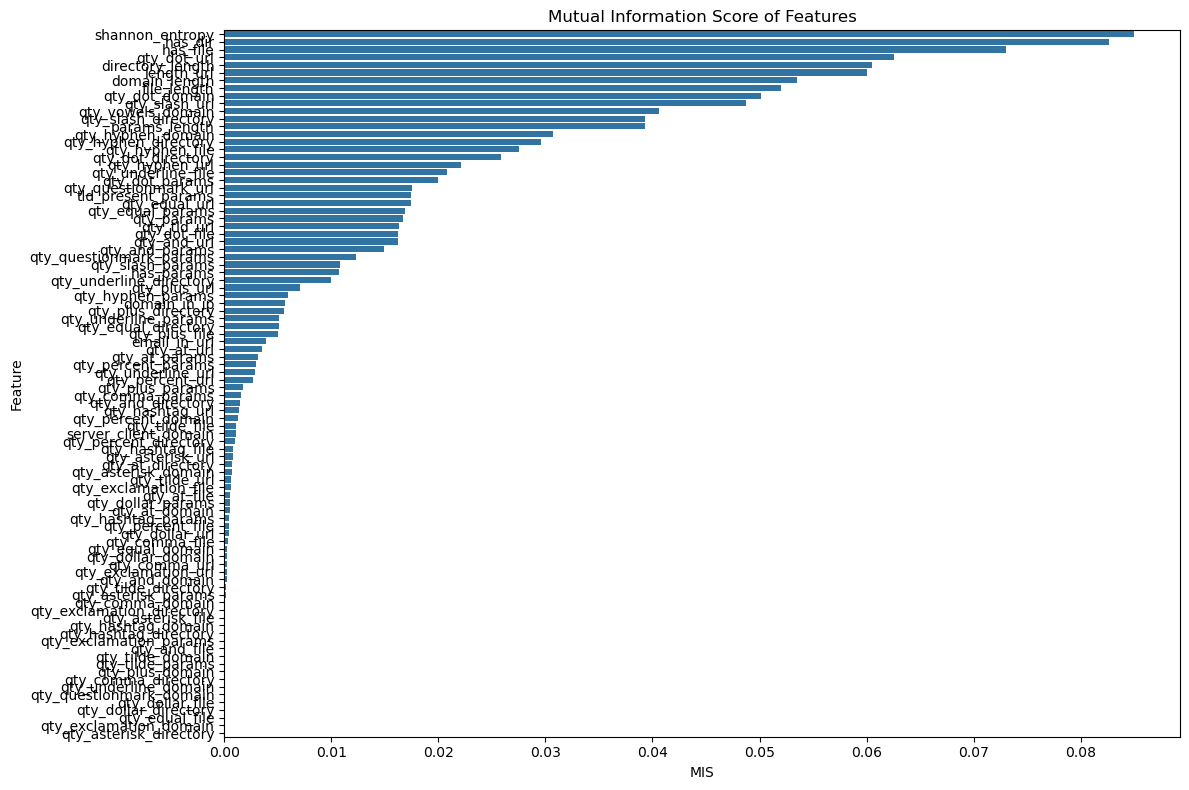

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset/all_feats1.csv')

X = df.drop(columns=['URL', 'Label'])
y = df['Label']

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# mutual information scores
mis = mutual_info_classif(X, y, discrete_features='auto')

mi_df = pd.DataFrame({'Feature': X.columns, 'MIS': mis})
mi_df = mi_df.sort_values(by='MIS', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='MIS', y='Feature', data=mi_df)
plt.title('Mutual Information Score of Features')
plt.xlabel('MIS')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

C:\Users\ansru\AppData\Local\Temp\ipykernel_13780\237513220.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MIS', y='Feature', data=mi_df_top, palette=colors)
C:\Users\ansru\AppData\Local\Temp\ipykernel_13780\237513220.py:28: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='MIS', y='Feature', data=mi_df_top, palette=colors)


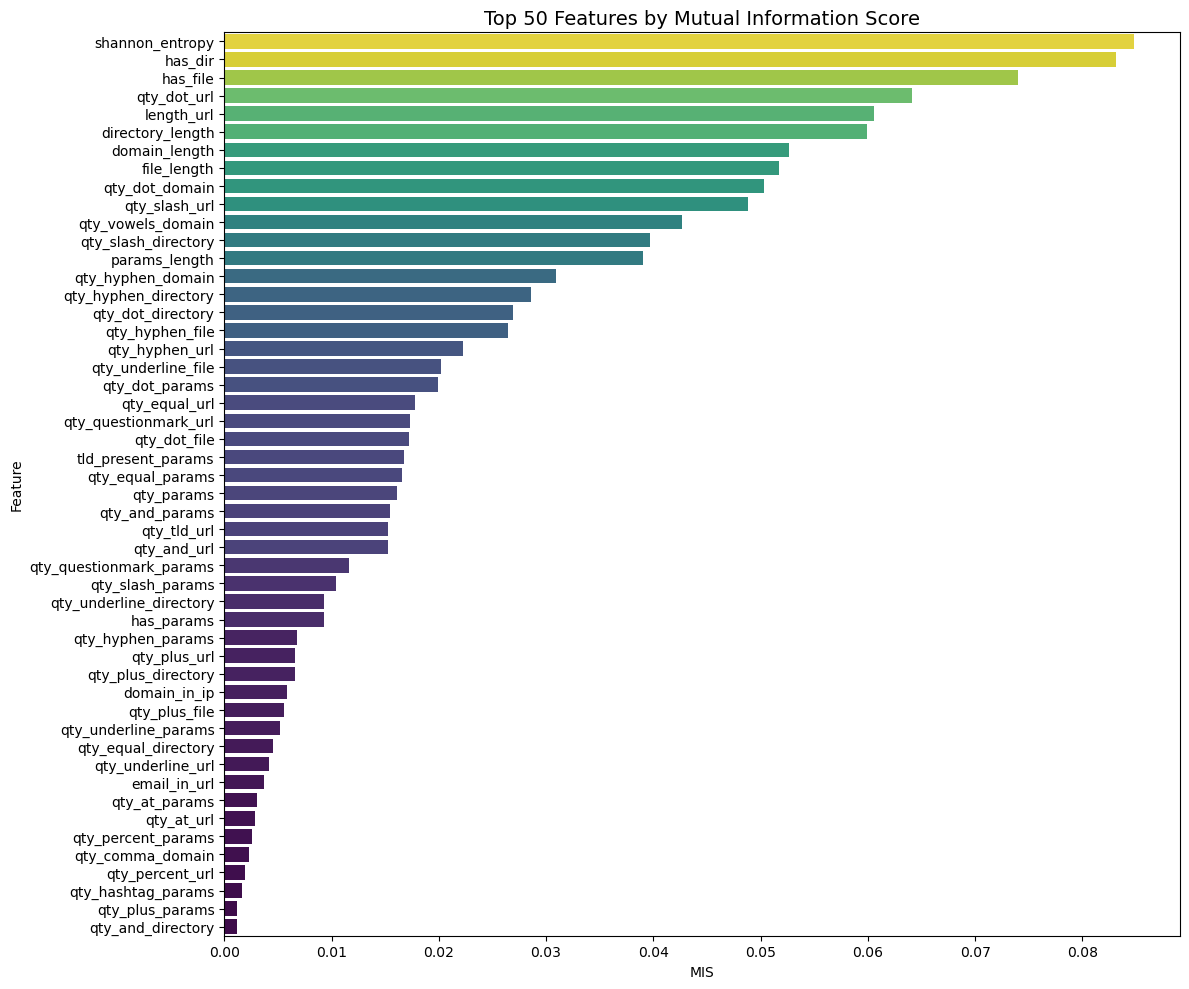

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset/all_feats1.csv')

X = df.drop(columns=['URL', 'Label'])
y = df['Label']

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

mis = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MIS': mis})
mi_df = mi_df.sort_values(by='MIS', ascending=False)

# showcase only top 50 features for better clarity
top_n = 50
mi_df_top = mi_df.head(top_n)

# color mapping
norm = plt.Normalize(mi_df_top['MIS'].min(), mi_df_top['MIS'].max())
colors = plt.cm.viridis(norm(mi_df_top['MIS'].values))

plt.figure(figsize=(12, 10))
sns.barplot(x='MIS', y='Feature', data=mi_df_top, palette=colors)
plt.title(f'Top {top_n} Features by Mutual Information Score', fontsize=14)
plt.xlabel('MIS')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

***

Splitting and features selection will be done later while evaluating each model by mean of a pipeline.